In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data.csv')
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
mf=df
df = df.dropna(axis=1)

In [9]:
mf.shape

(569, 33)

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# data distribution visualisations (barplots)

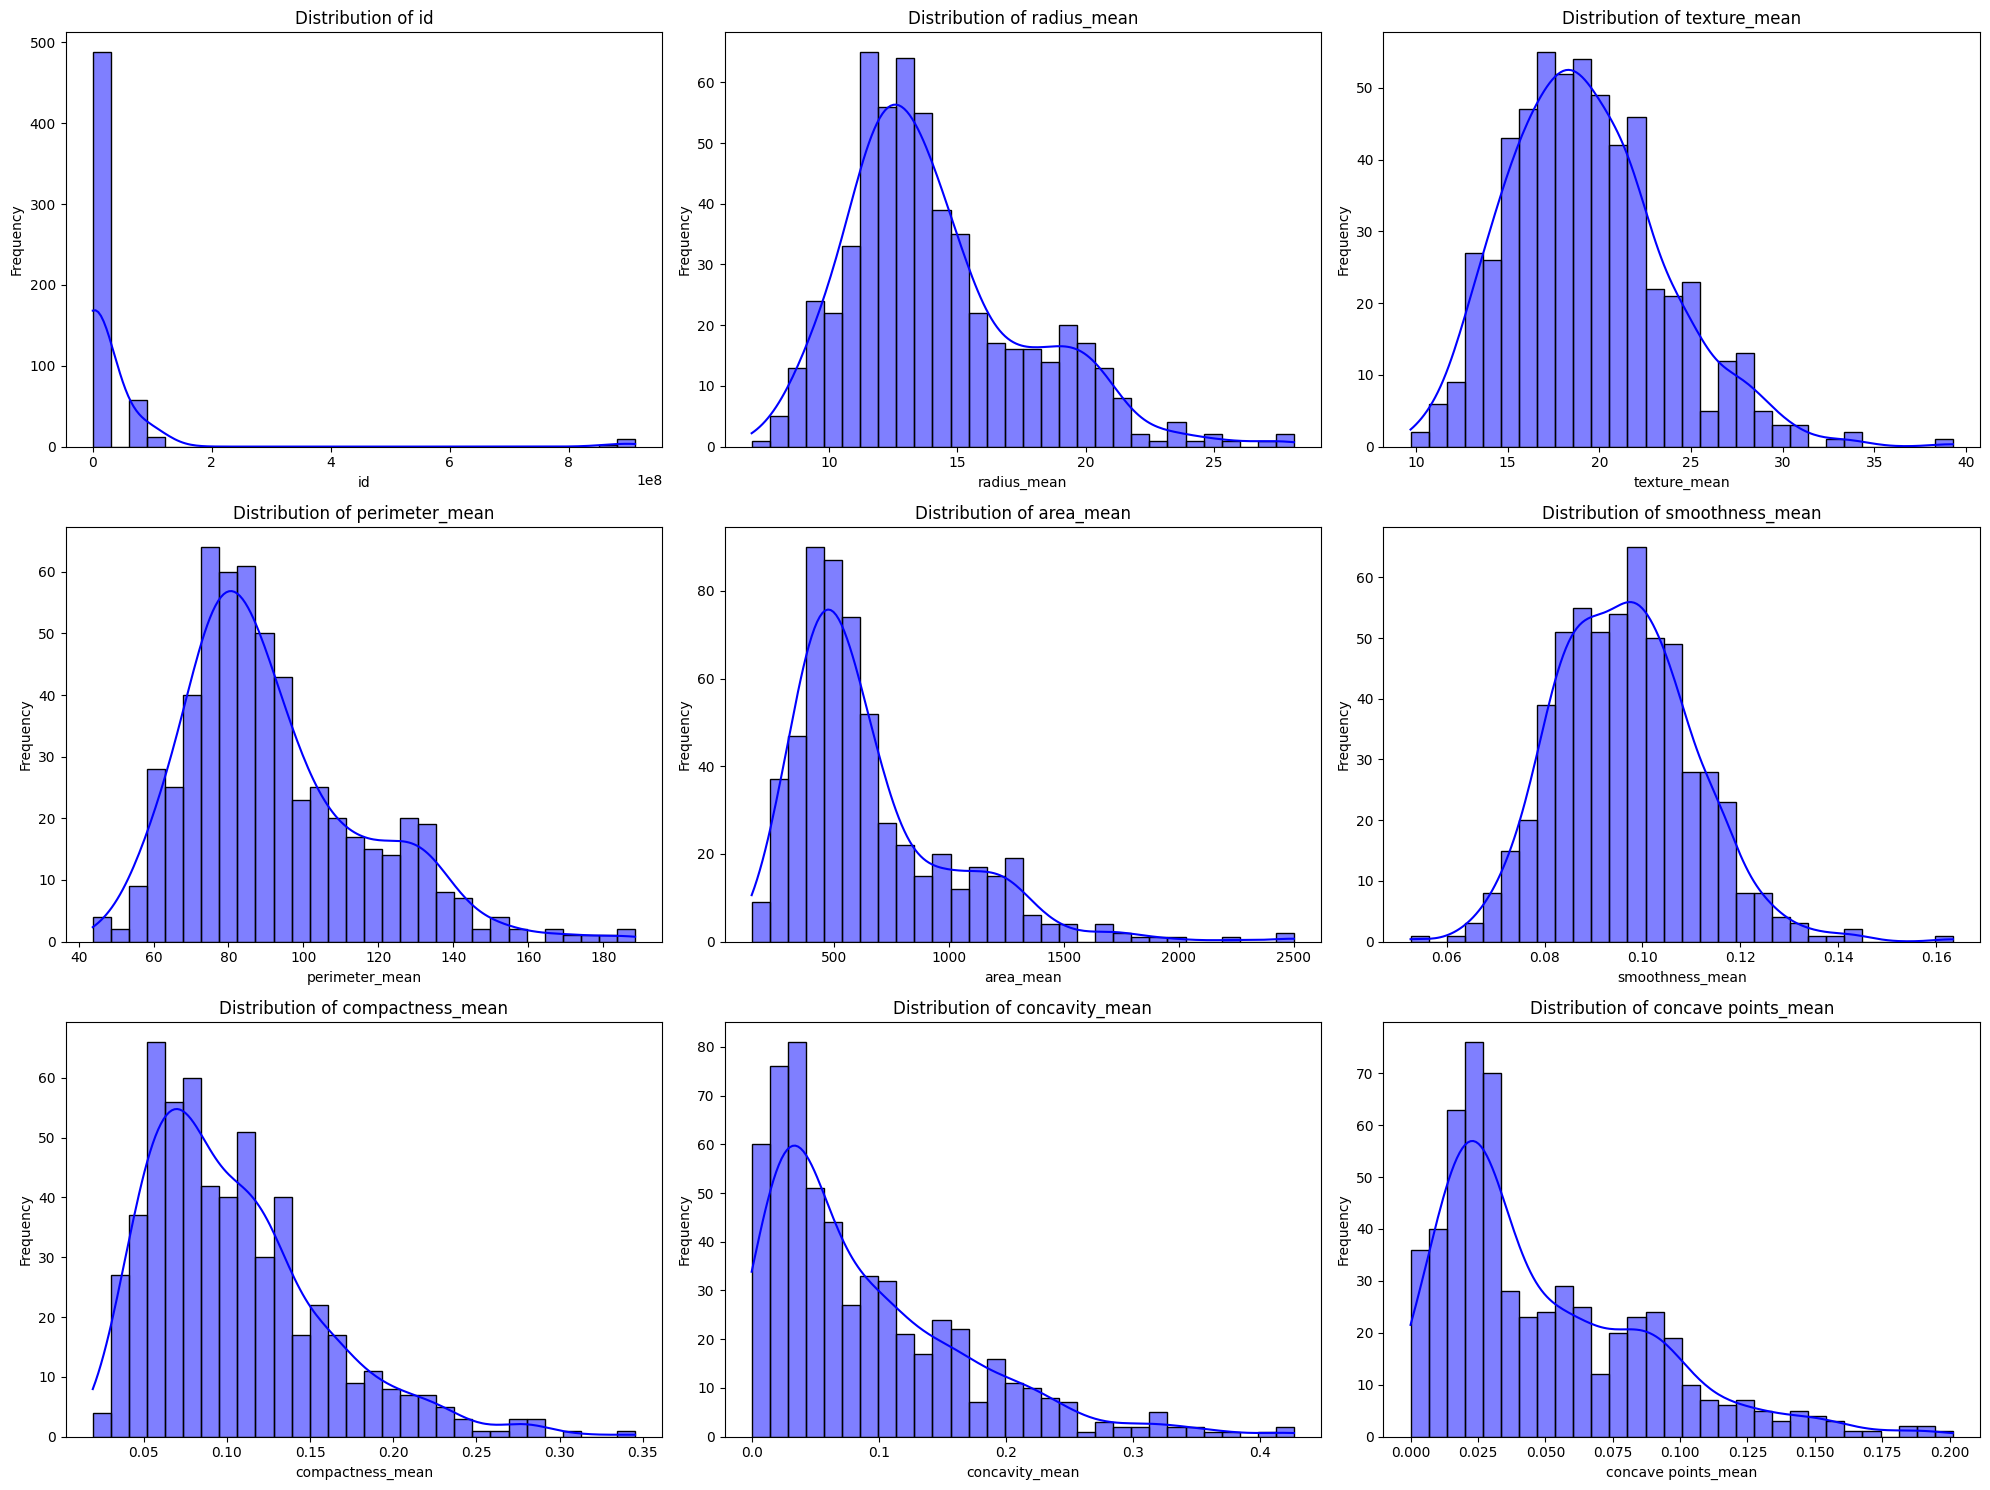

In [11]:


X = mf.drop('diagnosis', axis=1)  # Replace 'target' with the actual target column name
y = mf['diagnosis']

plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns[:9]):  # Visualize first 9 features
    plt.subplot(3, 3, i + 1)
    sns.histplot(X[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



# visualisation of relation between features (histogram)

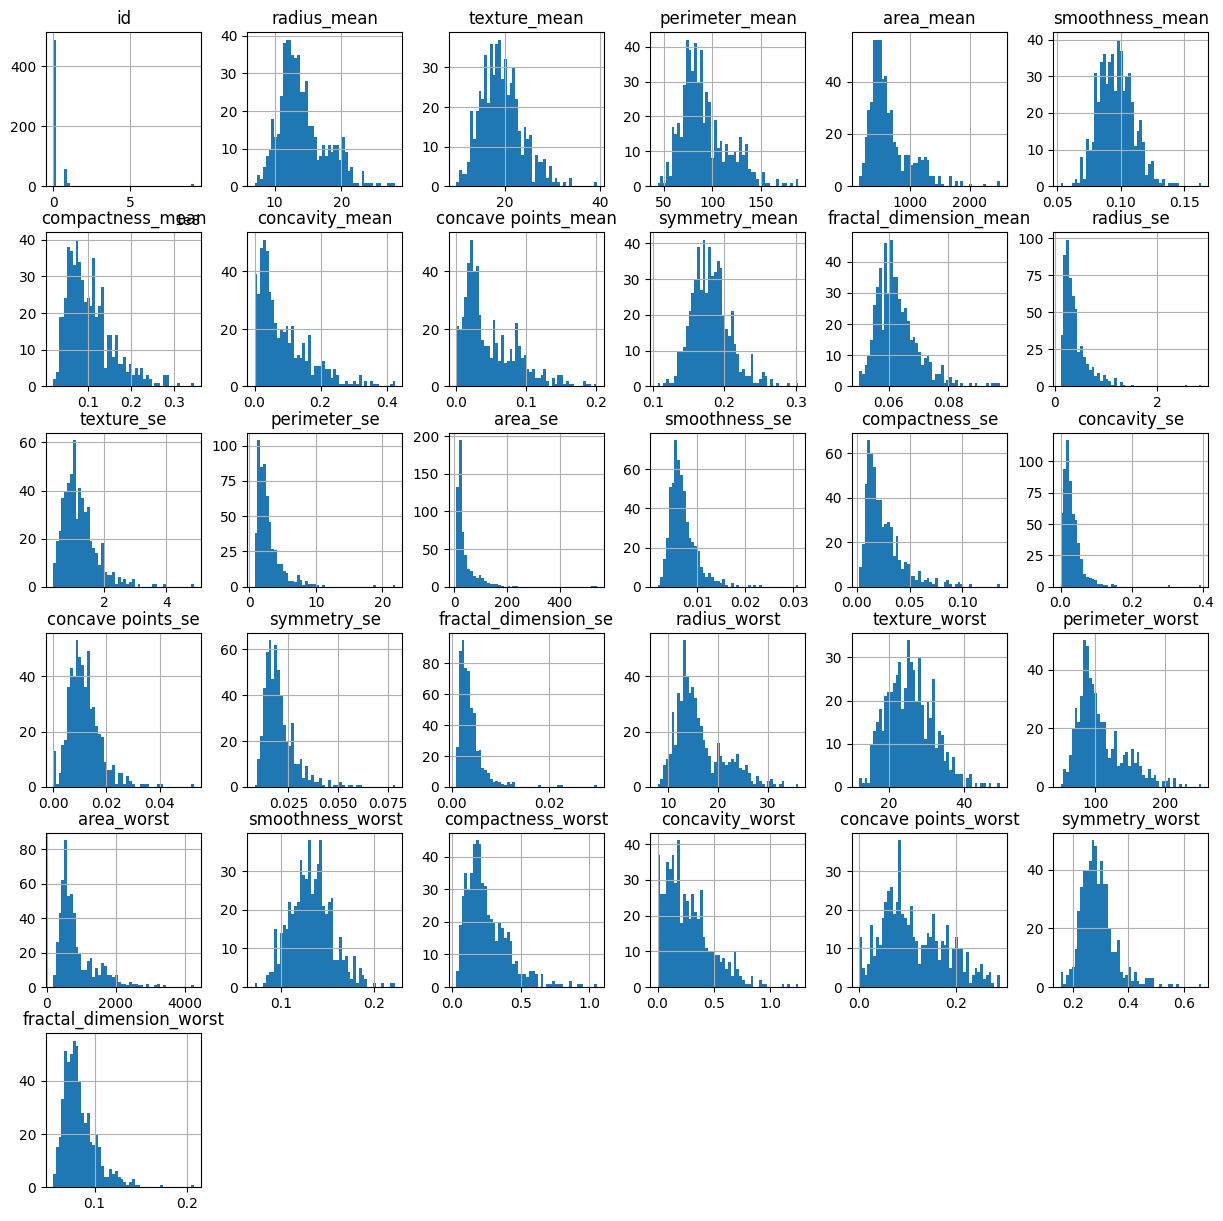

In [12]:
df.hist(bins = 50, figsize = (15,15))
plt.show()

# correlation graph

Features most correlated with 'diagnosis':
 diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se

C:\Users\USER\AppData\Local\Temp\ipykernel_24952\3672011303.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr_with_diagnosis.index, x=corr_with_diagnosis.values, palette='coolwarm')


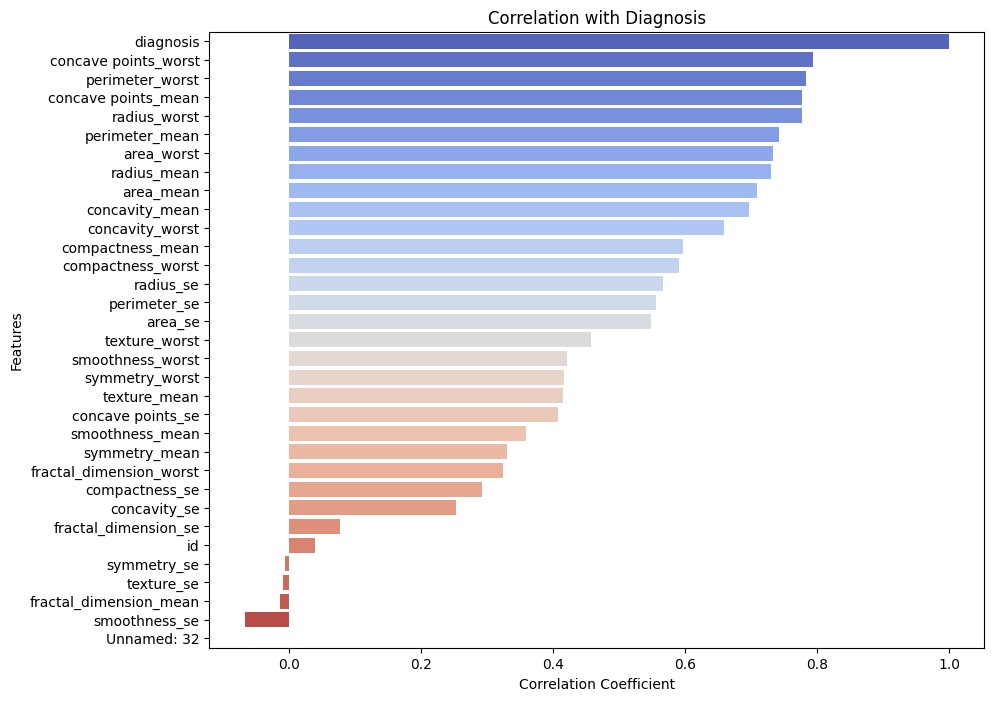

In [13]:


# Convert 'diagnosis' to numeric (e.g., M -> 1, B -> 0)
mf['diagnosis'] = mf['diagnosis'].map({'M': 1, 'B': 0})

# Drop non-numeric columns (if any)
mf_numeric = mf.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = mf_numeric.corr()

# Extract correlations related to the 'diagnosis' column
corr_with_diagnosis = corr_matrix['diagnosis'].sort_values(ascending=False)

# Display features most correlated with 'diagnosis'
print("Features most correlated with 'diagnosis':\n", corr_with_diagnosis)

# Plot the correlation heatmap for the top features (optional)
plt.figure(figsize=(10, 8))
sns.barplot(y=corr_with_diagnosis.index, x=corr_with_diagnosis.values, palette='coolwarm')
plt.title('Correlation with Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


### Models (training and testing data)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [15]:
x = df.iloc[:, 2:31].values 
y = df.iloc[:, 1].values 

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataframe
# Encode the labels
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(df['diagnosis'])

# Split data into features and labels
x = df.drop(['id', 'diagnosis'], axis=1)  # Drop non-feature columns
y = labelencoder_Y.transform(df['diagnosis'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
# Standardize features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### LogisticRegression

Accuracy: 0.9580419580
Precision: 0.9433962264
Recall: 0.9433962264
F1 Score: 0.9433962264
True Positives (TP): 50
True Negatives (TN): 87
False Positives (FP): 3
False Negatives (FN): 3


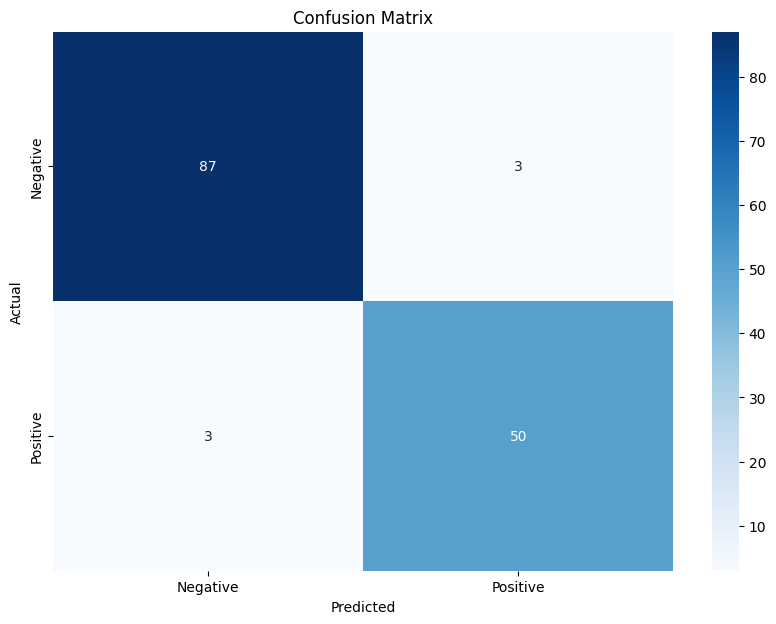

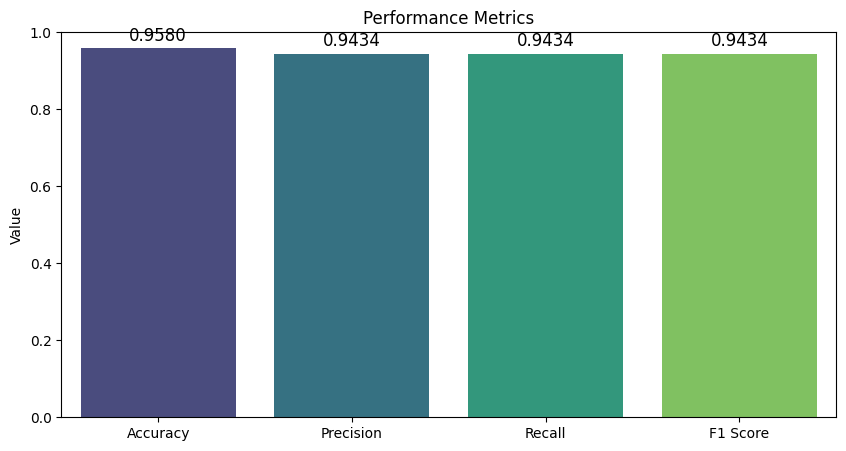

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and fit the Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics with 10 decimal places
print(f'Accuracy: {accuracy:.10f}')
print(f'Precision: {precision:.10f}')
print(f'Recall: {recall:.10f}')
print(f'F1 Score: {f1:.10f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis', hue=metrics, dodge=False, legend=False)
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Since metrics are between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
plt.legend([], [], frameon=False)  # Suppress the legend for aesthetic reasons
plt.show()



#### KNeighborsClassifier

Accuracy: 0.9510489510
Precision: 0.9791666667
Recall: 0.8867924528
F1 Score: 0.9306930693
True Positives (TP): 47
True Negatives (TN): 89
False Positives (FP): 1
False Negatives (FN): 6


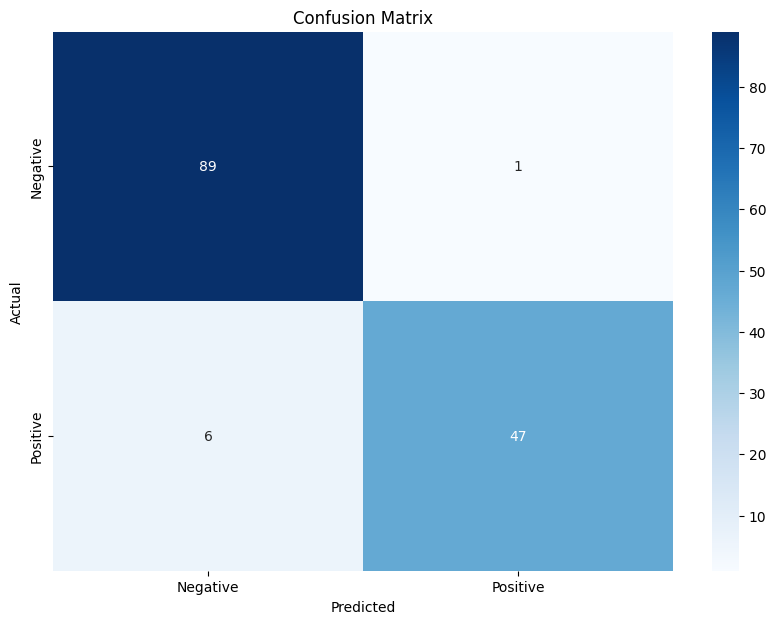

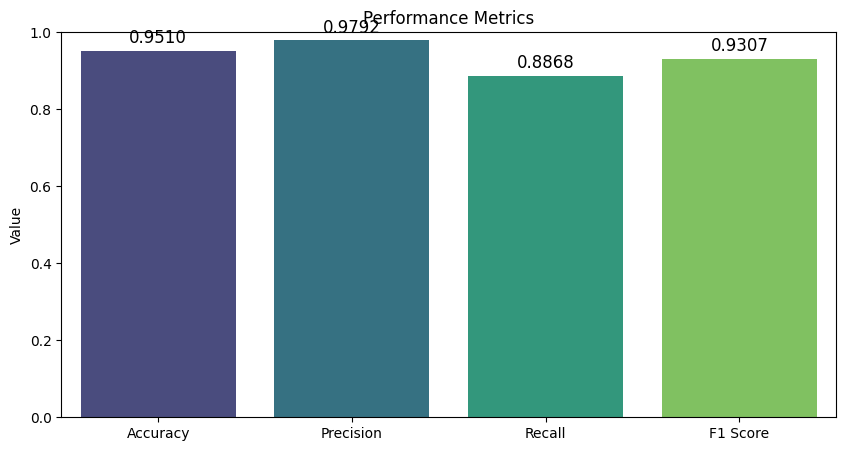

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and fit the K-Nearest Neighbors model
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics with 10 decimal places
print(f'Accuracy: {accuracy:.10f}')
print(f'Precision: {precision:.10f}')
print(f'Recall: {recall:.10f}')
print(f'F1 Score: {f1:.10f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis', hue=metrics, dodge=False, legend=False)
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Since metrics are between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
plt.legend([], [], frameon=False)  # Suppress the legend for aesthetic reasons
plt.show()



#### DecisionTreeClassifier

Accuracy: 0.8811188811
Precision: 0.7812500000
Recall: 0.9433962264
F1 Score: 0.8547008547
True Positives (TP): 50
True Negatives (TN): 76
False Positives (FP): 14
False Negatives (FN): 3


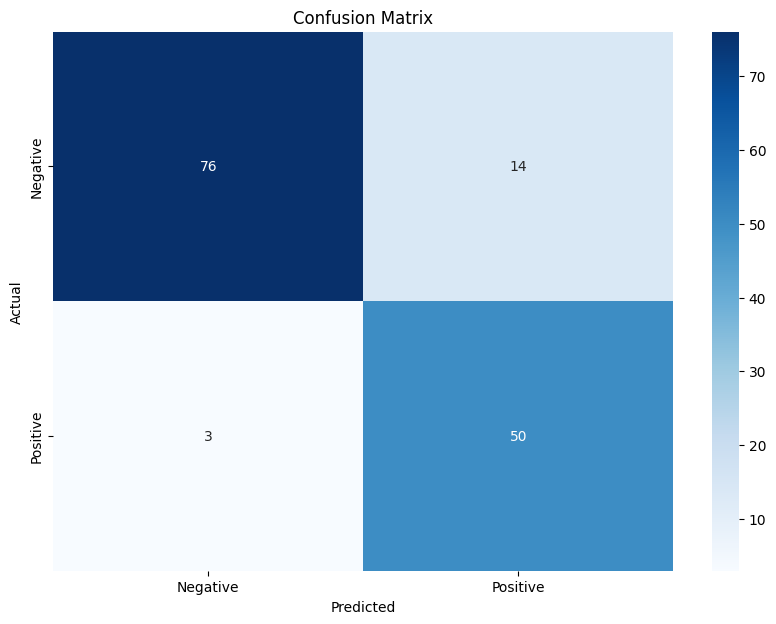

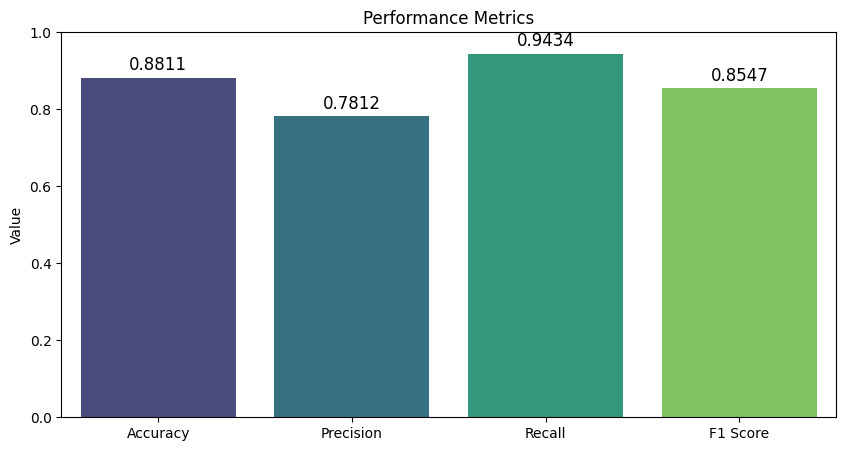

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Standardize features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Initialize and fit the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics with 10 decimal places
print(f'Accuracy: {accuracy:.10f}')
print(f'Precision: {precision:.10f}')
print(f'Recall: {recall:.10f}')
print(f'F1 Score: {f1:.10f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis', hue=metrics, dodge=False, legend=False)
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Since metrics are between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
plt.legend([], [], frameon=False)  # Suppress the legend for aesthetic reasons
plt.show()



#### SVC

Accuracy: 0.9650349650
Precision: 0.9615384615
Recall: 0.9433962264
F1 Score: 0.9523809524
True Positives (TP): 50
True Negatives (TN): 88
False Positives (FP): 2
False Negatives (FN): 3


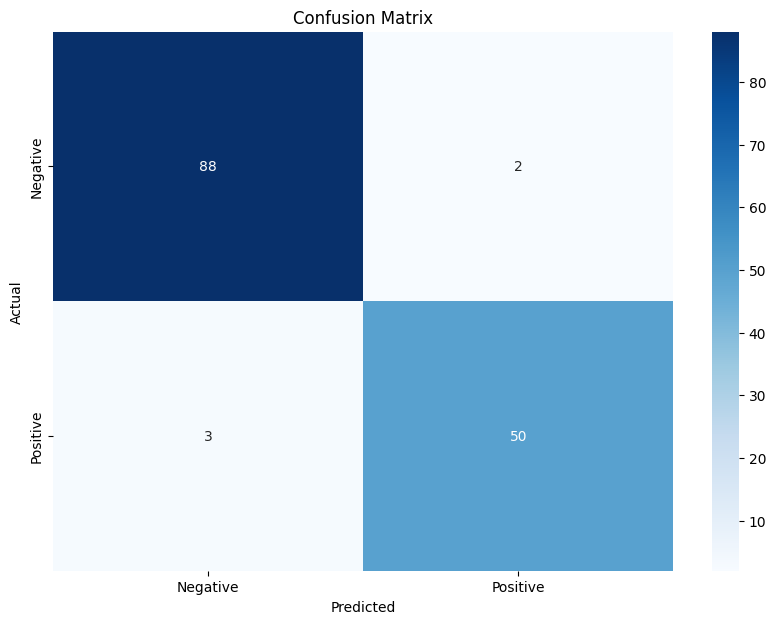

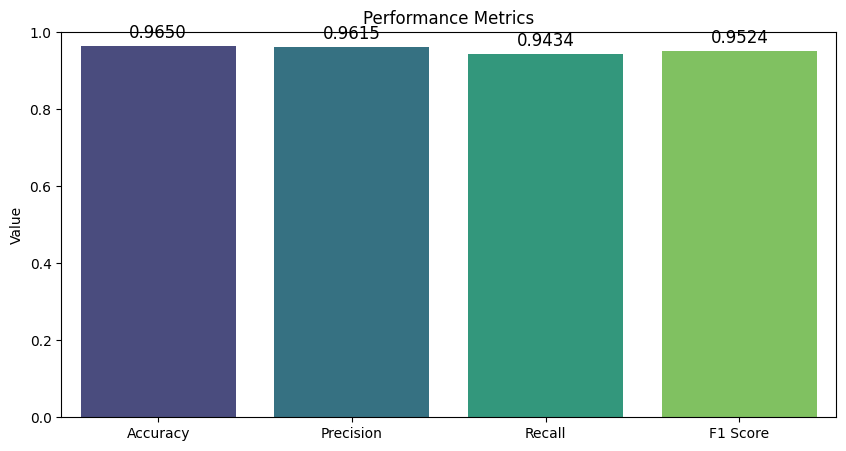

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and fit the Support Vector Classifier
classifier = SVC(random_state=0)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics with 10 decimal places
print(f'Accuracy: {accuracy:.10f}')
print(f'Precision: {precision:.10f}')
print(f'Recall: {recall:.10f}')
print(f'F1 Score: {f1:.10f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis', hue=metrics, dodge=False, legend=False)
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Since metrics are between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
plt.legend([], [], frameon=False)  # Suppress the legend for aesthetic reasons
plt.show()



#### GaussianNB

Accuracy: 0.9160839161
Precision: 0.8867924528
Recall: 0.8867924528
F1 Score: 0.8867924528
True Positives (TP): 47
True Negatives (TN): 84
False Positives (FP): 6
False Negatives (FN): 6


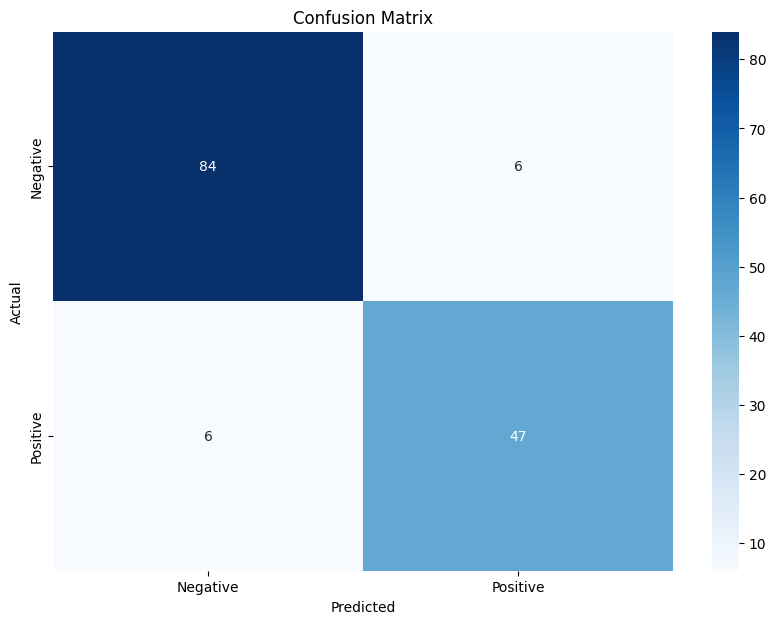

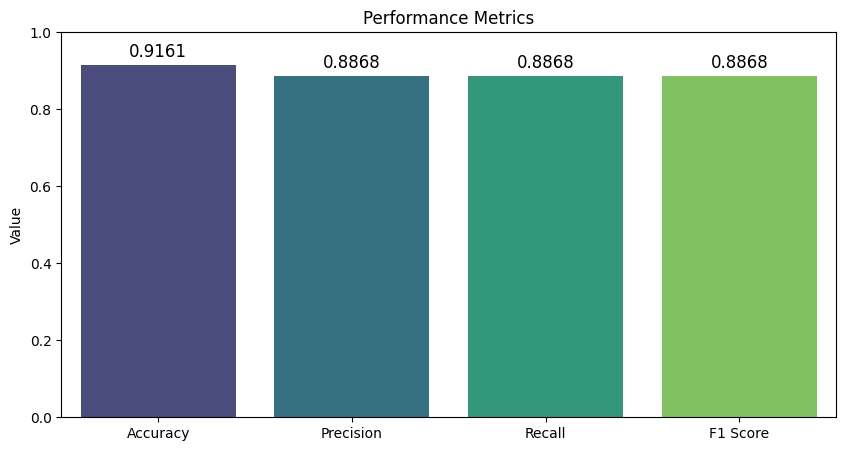

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and fit the Naive Bayes model
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics with 10 decimal places
print(f'Accuracy: {accuracy:.10f}')
print(f'Precision: {precision:.10f}')
print(f'Recall: {recall:.10f}')
print(f'F1 Score: {f1:.10f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis', hue=metrics, dodge=False, legend=False)
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Since metrics are between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
plt.legend([], [], frameon=False)  # Suppress the legend for aesthetic reasons
plt.show()



#### RandomForestClassifier

Accuracy: 0.9720279720
Precision: 0.9454545455
Recall: 0.9811320755
F1 Score: 0.9629629630
True Positives (TP): 52
True Negatives (TN): 87
False Positives (FP): 3
False Negatives (FN): 1


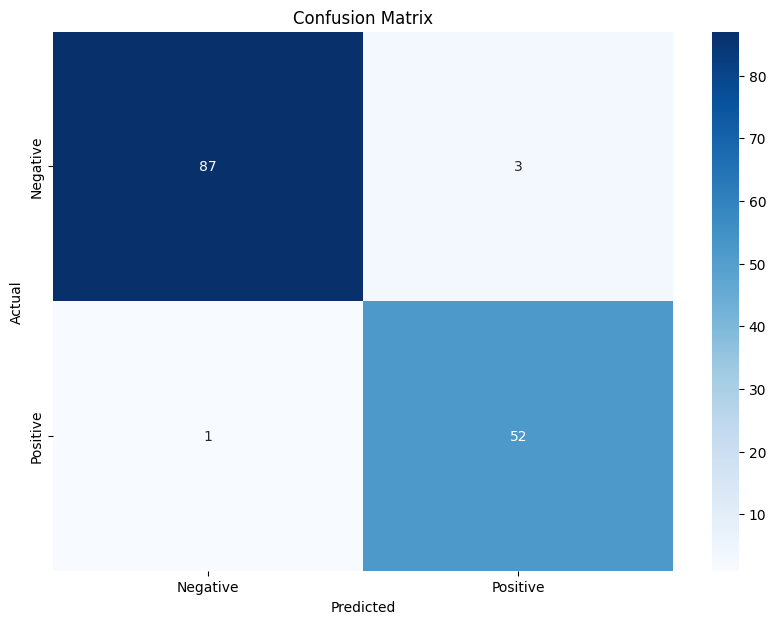

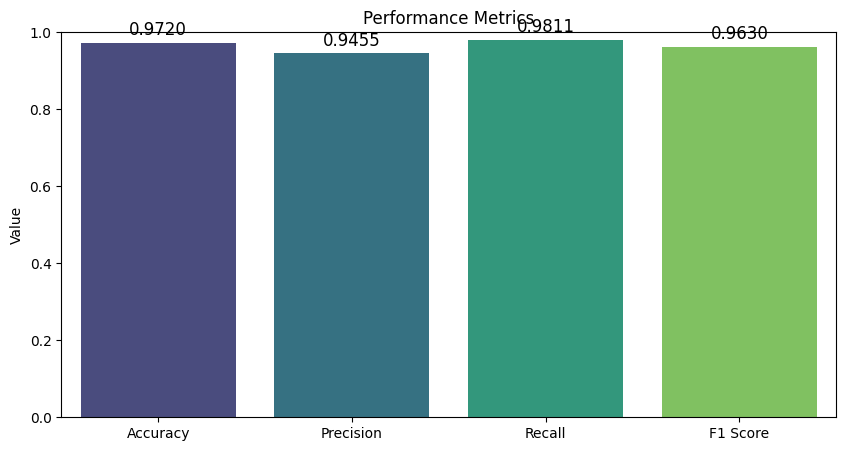

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and fit the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics with 10 decimal places
print(f'Accuracy: {accuracy:.10f}')
print(f'Precision: {precision:.10f}')
print(f'Recall: {recall:.10f}')
print(f'F1 Score: {f1:.10f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis', hue=metrics, dodge=False, legend=False)
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Metrics range between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
plt.legend([], [], frameon=False)  # Suppress the legend
plt.show()


# sample testing

In [24]:

from sklearn.metrics import classification_report
import joblib

# Assuming 'mf' is the dataset
# Selecting only the 7 features
selected_features = [
    'concave points_worst',
    'perimeter_worst',
    'concave points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'radius_mean'
]

# Prepare the data
X = mf[selected_features]
y = mf['diagnosis']  # Assuming 'diagnosis' is already mapped to 0 (B) and 1 (M)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model for reuse
joblib.dump(rf_model, 'random_forest_model.pkl')

# Predefined feature values for prediction
predefined_values = {
    'concave points_worst': 0.2654,
    'perimeter_worst': 184.6,
    'concave points_mean': 0.1471,
    'radius_worst': 25.38,
    'perimeter_mean': 122.8,
    'area_worst': 2019,
    'radius_mean': 17.99
}

# Convert to DataFrame
input_df = pd.DataFrame([predefined_values])

# Load the model and make a prediction
model = joblib.load('random_forest_model.pkl')
user_prediction = model.predict(input_df)

# Display the result
print("\nPrediction based on predefined inputs:")
for feature, value in predefined_values.items():
    print(f"{feature}: {value}")

if user_prediction[0] == 1:
    print("\nPrediction: Malignant (M)")
else:
    print("\nPrediction: Benign (B)")


Model Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Prediction based on predefined inputs:
concave points_worst: 0.2654
perimeter_worst: 184.6
concave points_mean: 0.1471
radius_worst: 25.38
perimeter_mean: 122.8
area_worst: 2019
radius_mean: 17.99

Prediction: Malignant (M)


# Bar Graph Comparing Accuracy, Precision, Recall, and F1 Score Across Models

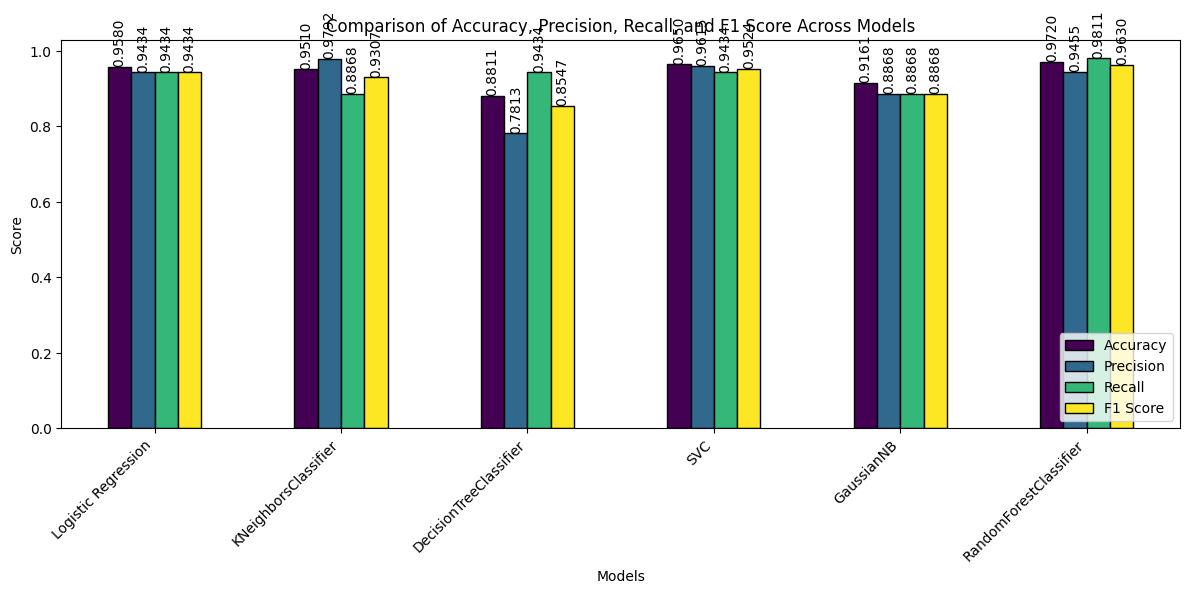

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
          'SVC', 'GaussianNB', 'RandomForestClassifier']

accuracy = [0.9580, 0.9510, 0.8811, 0.9650, 0.9161, 0.9720]
precision = [0.9434, 0.9792, 0.7813, 0.9615, 0.8868, 0.9455]
recall = [0.9434, 0.8868, 0.9434, 0.9434, 0.8868, 0.9811]
f1_score = [0.9434, 0.9307, 0.8547, 0.9524, 0.8868, 0.9630]

# Combine into a DataFrame
metrics_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}, index=models)

# Plotting the bar graph
ax = metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

# Add vertical values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, rotation=90)

# Customizing the plot
plt.title('Comparison of Accuracy, Precision, Recall, and F1 Score Across Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()




